In [110]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_csv('Historical Product Demand.csv', parse_dates=['Date'])

In [3]:
df.head

<bound method NDFrame.head of          Product_Code Warehouse Product_Category       Date  Order_Demand
0        Product_0993    Whse_J     Category_028 2012-07-27           100
1        Product_0979    Whse_J     Category_028 2012-01-19           500
2        Product_0979    Whse_J     Category_028 2012-02-03           500
3        Product_0979    Whse_J     Category_028 2012-02-09           500
4        Product_0979    Whse_J     Category_028 2012-03-02           500
...               ...       ...              ...        ...           ...
1048570  Product_1791    Whse_J     Category_006 2016-04-27          1000
1048571  Product_1974    Whse_J     Category_006 2016-04-27             1
1048572  Product_1787    Whse_J     Category_006 2016-04-28          2500
1048573  Product_0901    Whse_J     Category_023 2016-10-07            50
1048574  Product_0704    Whse_J     Category_001 2016-06-27             4

[1048575 rows x 5 columns]>

In [4]:
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1.048575e+06
unique,2160,4,33,1729,NaN
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,NaN
freq,16936,764447,481099,2075,NaN
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,4.867427e+03
std,NaN,NaN,NaN,NaN,2.893346e+04
min,NaN,NaN,NaN,NaN,-9.990000e+05
25%,NaN,NaN,NaN,NaN,1.800000e+01


In [5]:
df.shape

(1048575, 5)

In [6]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [7]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

This is Time Series Forecasting and the time/date is an important feature. So, I removed any rows that were missing a 'Date'.

In [8]:
df=df[df['Date'].notna()]
df['Date']=df['Date'].values.astype('float64')

C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1.037336e+06,1.037336e+06
unique,2160,4,33,NaN,NaN
top,Product_1359,Whse_J,Category_019,NaN,NaN
freq,16936,764447,470266,NaN,NaN
mean,NaN,NaN,NaN,1.402982e+18,4.920153e+03
std,NaN,NaN,NaN,4.468171e+16,2.907840e+04
min,NaN,NaN,NaN,1.294445e+18,-9.990000e+05
25%,NaN,NaN,NaN,1.365120e+18,1.900000e+01
50%,NaN,NaN,NaN,1.402358e+18,3.000000e+02
75%,NaN,NaN,NaN,1.440547e+18,2.000000e+03


In [12]:
df.describe()

,Date,Order_Demand
count,1.037336e+06,1.037336e+06
mean,1.402982e+18,4.920153e+03
std,4.468171e+16,2.907840e+04
min,1.294445e+18,-9.990000e+05
25%,1.365120e+18,1.900000e+01
50%,1.402358e+18,3.000000e+02
75%,1.440547e+18,2.000000e+03
max,1.483920e+18,4.000000e+06


In [13]:
df.dtypes

Product_Code         object
Warehouse            object
Product_Category     object
Date                float64
Order_Demand          int64
dtype: object

In [14]:
df.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                False
Order_Demand        False
dtype: bool

In [15]:
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1.037336e+06,1.037336e+06
unique,2160,4,33,NaN,NaN
top,Product_1359,Whse_J,Category_019,NaN,NaN
freq,16936,764447,470266,NaN,NaN
mean,NaN,NaN,NaN,1.402982e+18,4.920153e+03
std,NaN,NaN,NaN,4.468171e+16,2.907840e+04
min,NaN,NaN,NaN,1.294445e+18,-9.990000e+05
25%,NaN,NaN,NaN,1.365120e+18,1.900000e+01
50%,NaN,NaN,NaN,1.402358e+18,3.000000e+02
75%,NaN,NaN,NaN,1.440547e+18,2.000000e+03


To make the size of the dataset more managable for my environment, I decided to only take rows from the most prominent Warehouse.

In [16]:
df_ware=df.loc[df['Warehouse']=='Whse_J']

In [17]:
df_ware.shape

(764447, 5)

In [18]:
df_sub=df_ware.loc[df_ware['Product_Code']=='Product_1359']

In [19]:
df_sub.shape

(16936, 5)

In [20]:
df_sub.sort_values('Date', ascending=False)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
921328,Product_1359,Whse_J,Category_019,1.483661e+18,100000
943424,Product_1359,Whse_J,Category_019,1.482883e+18,50000
870423,Product_1359,Whse_J,Category_019,1.482883e+18,3000
877287,Product_1359,Whse_J,Category_019,1.482883e+18,3000
871104,Product_1359,Whse_J,Category_019,1.482883e+18,10000
...,...,...,...,...,...
20412,Product_1359,Whse_J,Category_019,1.325722e+18,150000
39340,Product_1359,Whse_J,Category_019,1.325722e+18,25000
63099,Product_1359,Whse_J,Category_019,1.325722e+18,5000
46739,Product_1359,Whse_J,Category_019,1.325722e+18,5000


In [21]:
df_sub.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,16936,16936,16936,1.693600e+04,1.693600e+04
unique,1,1,1,NaN,NaN
top,Product_1359,Whse_J,Category_019,NaN,NaN
freq,16936,16936,16936,NaN,NaN
mean,NaN,NaN,NaN,1.399823e+18,2.779346e+04
std,NaN,NaN,NaN,4.490290e+16,6.968933e+04
min,NaN,NaN,NaN,1.325722e+18,-5.000000e+05
25%,NaN,NaN,NaN,1.361297e+18,3.000000e+03
50%,NaN,NaN,NaN,1.397520e+18,1.000000e+04
75%,NaN,NaN,NaN,1.436832e+18,2.500000e+04


In [22]:
df_sub.dtypes

Product_Code         object
Warehouse            object
Product_Category     object
Date                float64
Order_Demand          int64
dtype: object

In [23]:
ware_enc=pd.get_dummies(df_sub['Warehouse'])
df_sub=df_sub.drop('Warehouse', axis=1)
df_sub=df_sub.join(ware_enc)

In [24]:
prod_enc=pd.get_dummies(df_sub['Product_Category'])
df_sub=df_sub.drop('Product_Category', axis=1)
df_sub=df_sub.join(prod_enc)

In [25]:
df_sub.dtypes

Product_Code     object
Date            float64
Order_Demand      int64
Whse_J            uint8
Category_019      uint8
dtype: object

In [26]:
df_sub=df_sub.drop(df_sub[['Product_Code']], axis=1)

In [77]:
X=df_sub['Date']
y=df_sub['Order_Demand']

In [78]:
X1=X.values.reshape(-1,1)
y1=y.values.ravel()

Trained a Gradient Boosting Regression Model...

In [79]:
gbr=GradientBoostingRegressor()
gbr.fit(X1,y1)

GradientBoostingRegressor()

In [102]:
gbr_ypred=gbr.predict(X1)
gbr_mse=mse(y1, gbr_ypred)
print(gbr_ypred)
print(gbr_mse)

[23712.06741757 24376.23158777 23562.7955839  ... 32269.58285919
 28785.85390203 30011.45372285]
4769869406.619504


In [106]:
gbr_ypreds=pd.DataFrame(gbr_ypred)
df_gbr=df_sub.join(gbr_ypreds)

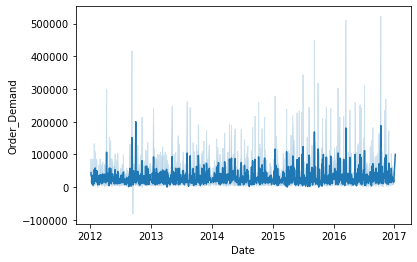

In [107]:
fig, ax=plt.subplots()
sns.lineplot(x='Date', y='Order_Demand', data=df_gbr, ax=ax);

In [82]:
df_sub.dtypes

Date            datetime64[ns]
Order_Demand             int64
Whse_J                   uint8
Category_019             uint8
dtype: object

In [81]:
df_sub['Date']=df_sub['Date'].astype('datetime64[ns]')

In [93]:
df_sub['Date']=pd.to_datetime(df_sub['Date'])
df_sub['Date']=df_sub['Date'].map(dt.datetime.toordinal)
X2=df_sub['Date']
y2=df_sub['Order_Demand']
X2=X2.values.reshape(-1,1)
y2=y2.values.reshape(-1,1)

Trained a Linear Regression model...

In [94]:
lin_reg=linear_model.LinearRegression().fit(X2, y2)
lin_ypred=lin_reg.predict(X2)
lin_mse=mse(y2, lin_ypred)
print(lin_ypred)
print(lin_mse)

[[25427.90241092]
 [25531.48127997]
 [25644.47640984]
 ...
 [30631.95589216]
 [30726.11850038]
 [30751.22852924]]
4853654489.004543


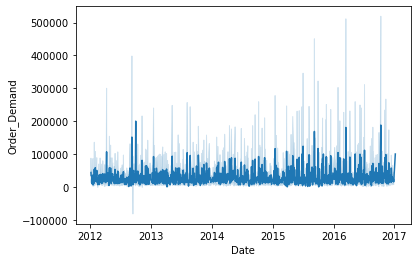

In [108]:
fig, ax=plt.subplots()
sns.lineplot(x='Date', y='Order_Demand', data=df_sub, ax=ax);

Briefly attempted an RNN, but quickly realized how little I understand about the details of building a neural network. 

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [111]:
model=keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
batch_size=64
model.fit(X2, y2, batch_size=batch_size)

ValueError: A target array with shape (16936, 1) was passed for an output of shape (None, 10) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.